In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-24.33967145550146 -154.43303232254314
82.83039732359816 -141.92844370665048
-43.97310706695233 165.81142271361642
67.61827700111087 -78.91227050007645
-19.444629155836992 131.83063503496209
16.78247303460661 -137.39688578811916
-58.72254190768679 89.03531177376368
-85.46867214435328 145.17389872985564
-82.40587860429326 -107.89444680833357
10.663677594501621 86.82495343846739
-54.480455097220144 118.81870174366401
0.305911968882711 -171.6257593605969
-43.546789541780605 75.02419664597596
88.22704871399702 50.07653295760625
89.02786030171697 -123.24146962961282
2.6105680348511697 -113.4420162903883
6.691799136360757 74.74964325135323
47.6658221637509 97.07426820520953
-7.531920246179055 -78.38725032510543
37.68012862886064 124.5526660465701
24.863684641698043 -98.96377402572955
-25.916935342149827 -144.47366402661402
45.78236535430659 174.4410779358126
42.8005116340193 -123.0417714515813
-71.46008171679563 157.87844457058884
-34.14731204355945 21.180258841397233
-20.721676116139065 -27

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf31479eb36e1cf8dfc7a2444e4d4c79'

In [9]:
# Import the time library and the datatime module from the datatime library
import time 
from datetime import datetime 

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avera
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | batticaloa
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | funadhoo
Processing Record 17 of Set 1 | kungurtug
Processing Record 18 of Set 1 | cajabamba
Processing Record 19 of Set 1 | yatou
Processing Record 20 of Set 1 | la reforma
Processing Record 21 of Set 1 | mataura
Processing Recor

Processing Record 38 of Set 4 | college
Processing Record 39 of Set 4 | katsuura
Processing Record 40 of Set 4 | saskylakh
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | nagua
Processing Record 43 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 4 | bensonville
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | duncan
Processing Record 49 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 50 of Set 4 | jiazi
Processing Record 1 of Set 5 | sao jose da coroa grande
Processing Record 2 of Set 5 | north bend
Processing Record 3 of Set 5 | nsanje
Processing Record 4 of Set 5 | placerville
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | oistins
Processing Record 7 of Set 5 | caloundra
Processing Record 8 of Set 5 | santa maria del oro
Processing Record 9 of Set 5 | kuche
City not found. Skipping...
Pro

Processing Record 25 of Set 8 | atar
Processing Record 26 of Set 8 | pangody
Processing Record 27 of Set 8 | ahuimanu
Processing Record 28 of Set 8 | lethem
Processing Record 29 of Set 8 | jussara
Processing Record 30 of Set 8 | saquarema
Processing Record 31 of Set 8 | whitehorse
Processing Record 32 of Set 8 | quetzaltepec
City not found. Skipping...
Processing Record 33 of Set 8 | shieli
Processing Record 34 of Set 8 | san-pedro
Processing Record 35 of Set 8 | viedma
Processing Record 36 of Set 8 | baie-comeau
Processing Record 37 of Set 8 | xam nua
Processing Record 38 of Set 8 | camacha
Processing Record 39 of Set 8 | celestun
Processing Record 40 of Set 8 | emerald
Processing Record 41 of Set 8 | mansa
Processing Record 42 of Set 8 | mandal
Processing Record 43 of Set 8 | berlevag
Processing Record 44 of Set 8 | antofagasta
Processing Record 45 of Set 8 | botshabelo
Processing Record 46 of Set 8 | conde
Processing Record 47 of Set 8 | ji-parana
City not found. Skipping...
Process

Processing Record 12 of Set 12 | sabang
Processing Record 13 of Set 12 | pacific grove
Processing Record 14 of Set 12 | fort-shevchenko
Processing Record 15 of Set 12 | filotion
Processing Record 16 of Set 12 | turukhansk
Processing Record 17 of Set 12 | marevo
Processing Record 18 of Set 12 | camapua
Processing Record 19 of Set 12 | lakes entrance
Processing Record 20 of Set 12 | betioky
Processing Record 21 of Set 12 | vlad tepes
Processing Record 22 of Set 12 | saint-augustin
Processing Record 23 of Set 12 | cayenne
Processing Record 24 of Set 12 | atambua
Processing Record 25 of Set 12 | rawson
Processing Record 26 of Set 12 | sorland
Processing Record 27 of Set 12 | ouallam
Processing Record 28 of Set 12 | mundo novo
Processing Record 29 of Set 12 | freeport
Processing Record 30 of Set 12 | karad
Processing Record 31 of Set 12 | mirnyy
Processing Record 32 of Set 12 | oranjestad
Processing Record 33 of Set 12 | thinadhoo
Processing Record 34 of Set 12 | kushmurun
Processing Record

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avera,33.1940,-82.5271,49.51,44,0,4.25,US,2022-10-23 03:03:03
1,Tuktoyaktuk,69.4541,-133.0374,15.82,87,14,9.01,CA,2022-10-23 03:03:03
2,Te Anau,-45.4167,167.7167,57.65,64,100,9.53,NZ,2022-10-23 03:03:04
3,Clyde River,70.4692,-68.5914,20.01,91,99,7.36,CA,2022-10-23 03:03:04
4,Alice Springs,-23.7000,133.8833,88.21,40,1,8.05,AU,2022-10-23 03:00:08
5,Hilo,19.7297,-155.0900,82.27,75,20,8.05,US,2022-10-23 03:03:05
6,Busselton,-33.6500,115.3333,64.99,62,100,0.18,AU,2022-10-23 03:00:26
7,Hobart,-42.8794,147.3294,57.06,64,75,14.97,AU,2022-10-23 03:00:06
8,Punta Arenas,-53.1500,-70.9167,42.91,87,75,4.61,CL,2022-10-23 03:03:06
9,Batticaloa,7.7102,81.6924,81.30,73,100,9.98,LK,2022-10-23 03:03:06


In [12]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City","Country","Date","Lat",
                    "Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

# Assign a new or the same DataFrame the new column order. 
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avera,US,2022-10-23 03:03:03,33.1940,-82.5271,49.51,44,0,4.25
1,Tuktoyaktuk,CA,2022-10-23 03:03:03,69.4541,-133.0374,15.82,87,14,9.01
2,Te Anau,NZ,2022-10-23 03:03:04,-45.4167,167.7167,57.65,64,100,9.53
3,Clyde River,CA,2022-10-23 03:03:04,70.4692,-68.5914,20.01,91,99,7.36
4,Alice Springs,AU,2022-10-23 03:00:08,-23.7000,133.8833,88.21,40,1,8.05
5,Hilo,US,2022-10-23 03:03:05,19.7297,-155.0900,82.27,75,20,8.05
6,Busselton,AU,2022-10-23 03:00:26,-33.6500,115.3333,64.99,62,100,0.18
7,Hobart,AU,2022-10-23 03:00:06,-42.8794,147.3294,57.06,64,75,14.97
8,Punta Arenas,CL,2022-10-23 03:03:06,-53.1500,-70.9167,42.91,87,75,4.61
9,Batticaloa,LK,2022-10-23 03:03:06,7.7102,81.6924,81.30,73,100,9.98


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1666495655.0199382

In [16]:
today = time.strftime("%x")
today

'10/22/22'

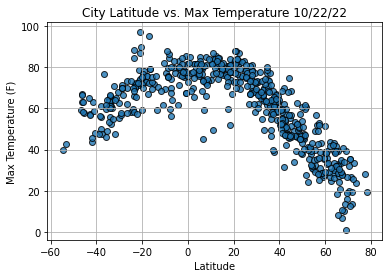

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

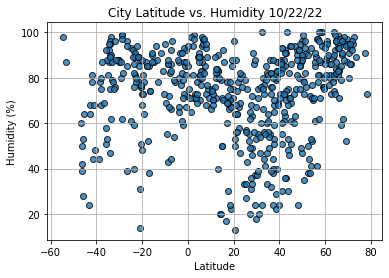

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

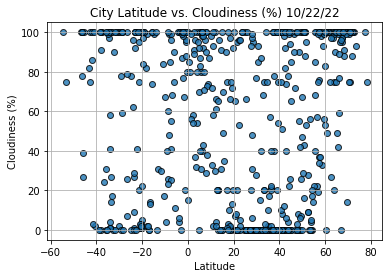

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

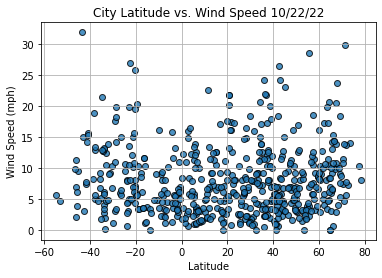

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avera,US,2022-10-23 03:03:03,33.1940,-82.5271,49.51,44,0,4.25
1,Tuktoyaktuk,CA,2022-10-23 03:03:03,69.4541,-133.0374,15.82,87,14,9.01
3,Clyde River,CA,2022-10-23 03:03:04,70.4692,-68.5914,20.01,91,99,7.36
5,Hilo,US,2022-10-23 03:03:05,19.7297,-155.0900,82.27,75,20,8.05
9,Batticaloa,LK,2022-10-23 03:03:06,7.7102,81.6924,81.30,73,100,9.98
...,...,...,...,...,...,...,...,...,...
547,Huilong,CN,2022-10-23 03:18:07,31.8111,121.6550,67.95,60,40,15.93
548,Dingle,PH,2022-10-23 03:19:07,10.9995,122.6711,86.81,68,100,6.64
549,Ventspils,LV,2022-10-23 03:19:08,57.3894,21.5606,51.73,100,100,12.66
553,Olkusz,PL,2022-10-23 03:19:10,50.2813,19.5650,51.19,99,29,5.77


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avera,US,2022-10-23 03:03:03,33.1940,-82.5271,49.51,44,0,4.25
1,Tuktoyaktuk,CA,2022-10-23 03:03:03,69.4541,-133.0374,15.82,87,14,9.01
3,Clyde River,CA,2022-10-23 03:03:04,70.4692,-68.5914,20.01,91,99,7.36
5,Hilo,US,2022-10-23 03:03:05,19.7297,-155.0900,82.27,75,20,8.05
9,Batticaloa,LK,2022-10-23 03:03:06,7.7102,81.6924,81.30,73,100,9.98


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

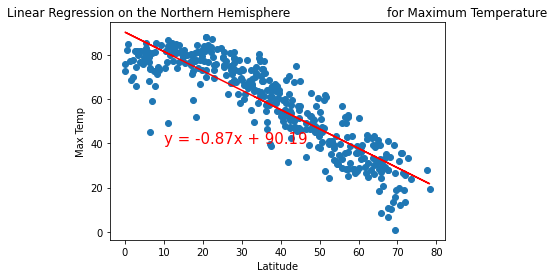

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

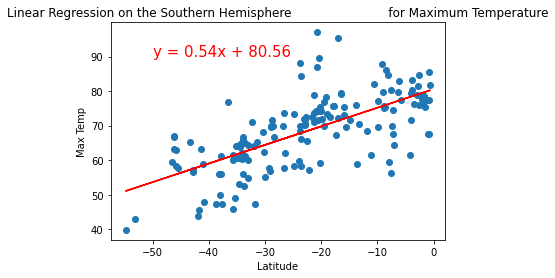

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

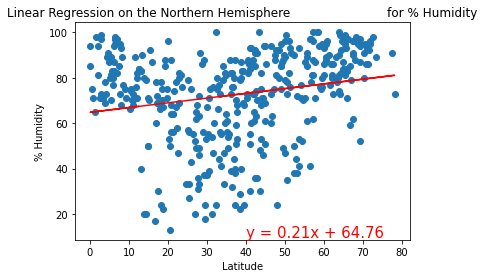

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

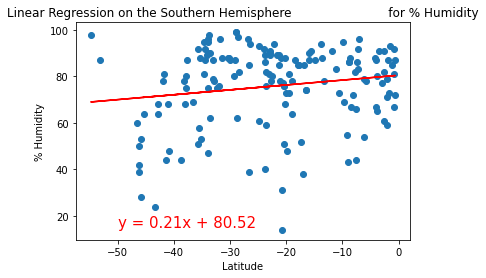

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

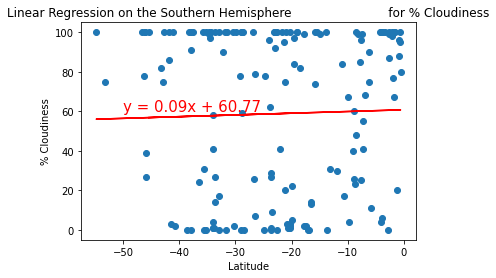

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

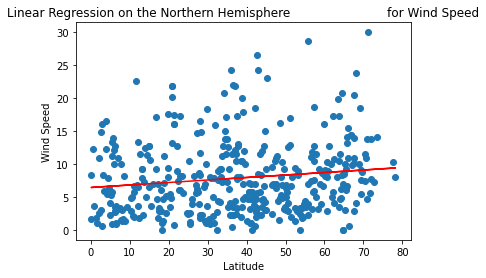

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

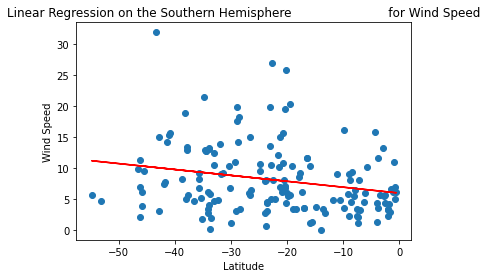

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))